# Clustering Travel Agency Booking Data

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
import io
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [49]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [50]:
travel.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


# Dataset Description of fields (added after video was recorded)
![alt text](https://miro.medium.com/max/704/1*qx6uN9Zr1Y2BVtm_yCAv5Q.png)

In [51]:
print ("Rows :" , travel.shape[0])
print("Columns :", travel.shape[1])
print("\nFeatures : \n" ,travel.columns.tolist())
print("\nMissing values : ", travel.isnull().sum().values.sum())
print("\nUnique values : \n", travel.nunique())

Rows : 100000
Columns : 25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :  36329

Unique values : 
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co              

In [52]:
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [53]:
travel.isnull().sum()

,0
Unnamed: 0,0
date_time,0
site_name,0
posa_continent,0
user_location_country,0
user_location_region,0
user_location_city,0
orig_destination_distance,36085
user_id,0
is_mobile,0


In [54]:
numeric_columns = travel.select_dtypes(include=[np.number])

# Compute the correlation matrix on the numeric columns
corr = numeric_columns.corr()

# Display the correlation matrix
corr

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

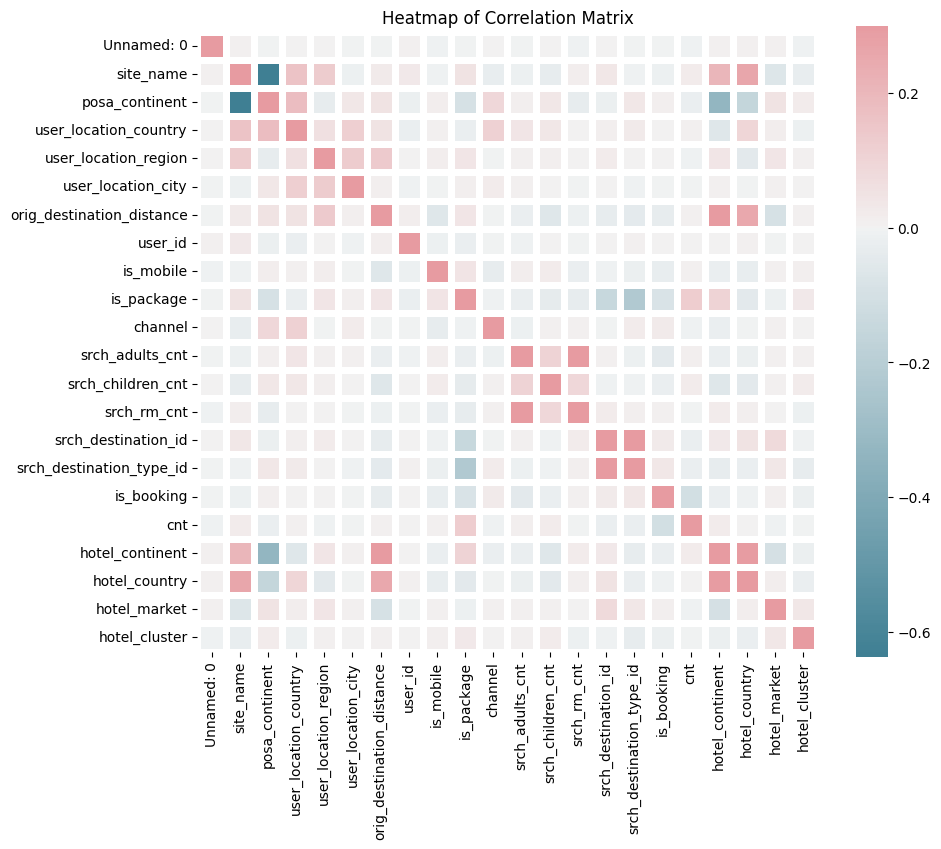

In [55]:
plt.figure(figsize = (10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = cmap, vmax= .3, center = 0, square = True, linewidths = 5, cbar_kws = {"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

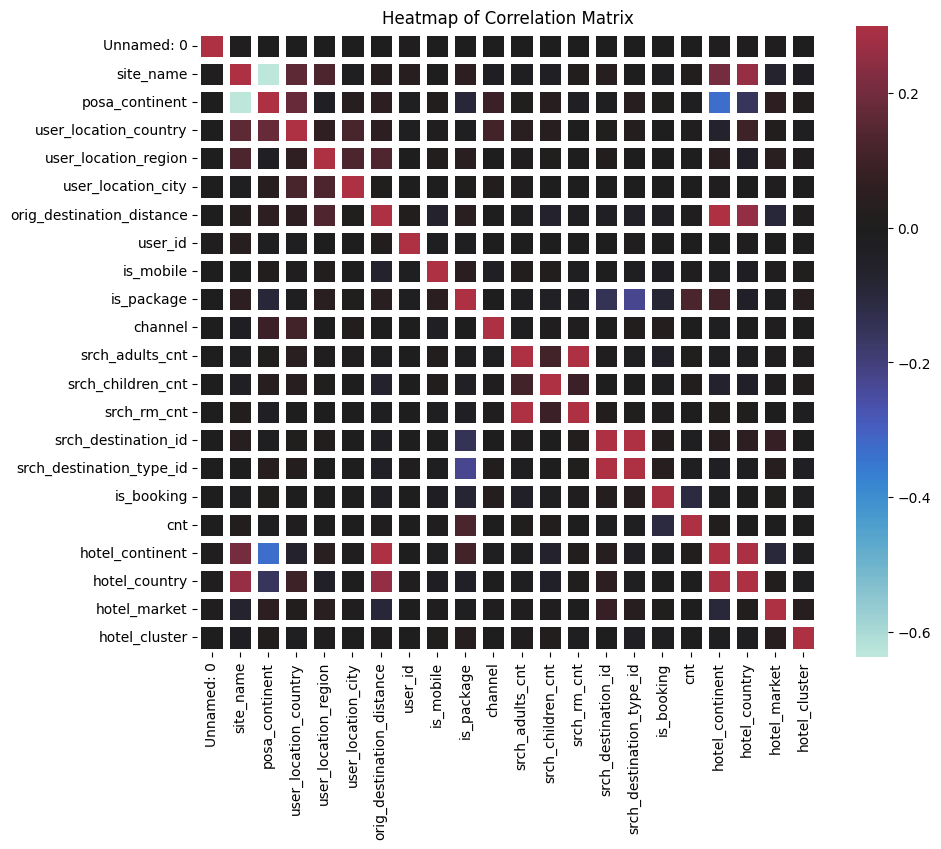

In [56]:
plt.figure(figsize = (10, 10))
# cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmax= .3, center = 0, square = True, linewidths = 5, cbar_kws = {"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

array([[<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'is_booking'}>,
        <Axes: title={'center': 'is_mobile'}>],
       [<Axes: title={'center': 'orig_destination_distance'}>,
        <Axes: title={'center': 'srch_rm_cnt'}>,
        <Axes: title={'center': 'srch_adults_cnt'}>],
       [<Axes: title={'center': 'srch_children_cnt'}>, <Axes: >,
        <Axes: >]], dtype=object)

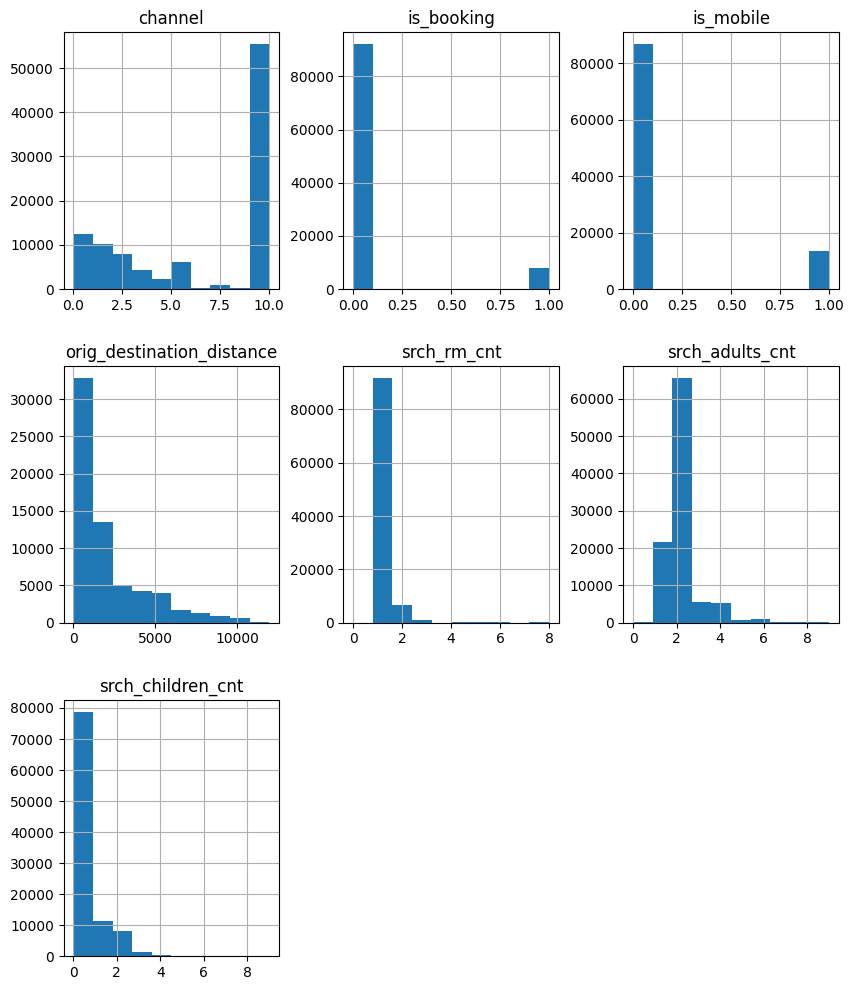

In [57]:
travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10,12))

In [58]:
travel.groupby('user_id')['is_booking'].agg(num_of_bookings='count') \
    .reset_index() \
    .groupby('num_of_bookings')['user_id'].agg('count')

,user_id
num_of_bookings,
1,79189
2,8423
3,1065
4,161
5,24
6,1


### Why are we doing this?

In [59]:
booking_count_per_user = travel.groupby('user_id')['is_booking'].agg(['count']).reset_index()
booking_count_per_user.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


array([[<Axes: title={'center': 'count'}>]], dtype=object)

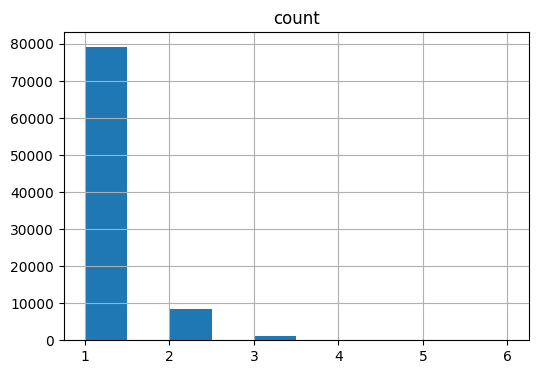

In [60]:
booking_count_per_user[['count']].hist(figsize=(6,4))

In [61]:
travel.groupby('user_id')['is_booking'].agg(['count']).head()

,count
user_id,
14,1
38,1
40,1
156,2
160,1


In [62]:
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,12812,5,0,1,2,50,368,83,1


# Now let's do some Logic Checks

In [63]:
pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [64]:
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,12812,5,0,1,2,50,368,83,1


In [65]:
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['date_time'] = pd.to_datetime(travel['date_time'])
travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,12812,5,0,1,2,50,368,83,1,2014-06-10


In [66]:
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']]

,srch_ci,date
5809,2014-01-05,2014-01-07
12310,2014-10-13,2014-10-14
19014,2014-02-11,2014-10-09
21780,2014-03-10,2014-09-15
22573,2014-09-12,2014-12-02
25056,2014-08-02,2014-08-23
30802,2013-09-20,2013-09-21
30929,2014-07-08,2014-07-29
35776,2014-12-01,2014-12-02
40107,2014-04-11,2014-10-26


# Feature Engineering

In [67]:
#Let's create some new columns that can provide some useful info (not always necesary but help when doing clusters/decision trees)
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [68]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,2,198,786,37,1,2013-03-13,1.0,0.0
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,0,1,2,50,368,83,1,2014-06-10,5.0,54.0


### Statistical Analysis of Booking Channels

In [69]:
travel.groupby('channel')['is_booking'].agg(booking_rate='mean', num_of_bookings='count') \
    .reset_index() \
    .sort_values(by='channel')


,channel,booking_rate,num_of_bookings
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


In [70]:
def stats_comparison(i):
    '''Returns a breakdown of stats per channel'''

    # Group by the specified column and aggregate mean and count for is_booking
    travel_stats = travel.groupby(i)['is_booking'].agg(average='mean', bookings='count').reset_index()

    # Calculate sub_average, sub_bookings, overall stats
    cat = travel_stats.copy()
    cat['overall_average'] = travel['is_booking'].mean()
    cat['overall_bookings'] = travel['is_booking'].count()

    # Calculate the rest of the bookings excluding the current group
    cat['rest_bookings'] = cat['overall_bookings'] - cat['bookings']
    cat['rest_average'] = (cat['overall_bookings'] * cat['overall_average'] - cat['bookings'] * cat['average']) / cat['rest_bookings']

    # Handle division by zero in rest_bookings to avoid invalid values
    cat['rest_bookings'].replace(0, np.nan, inplace=True)  # Replace 0 with NaN for safe division

    # Calculate the z-score for comparison
    cat['z_score'] = (cat['average'] - cat['rest_average']) / np.sqrt(
        cat['overall_average'] * (1 - cat['overall_average']) *
        (1 / cat['bookings'] + 1 / cat['rest_bookings'])
    )

    # Calculate the probability using the z-score
    cat['prob'] = np.around(stats.norm.cdf(cat['z_score']), decimals=10)

    # Classify significance based on the probability
    cat['significant'] = cat['prob'].apply(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)

    # Return the result
    return cat

# Call the function
stats_comparison('channel')


<ipython-input-70-f9cc85a0209c>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat['rest_bookings'].replace(0, np.nan, inplace=True)  # Replace 0 with NaN for safe division


,channel,average,bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.071948,12523,0.07993,100000,87477,0.081073,-3.521880,2.142494e-04,-1
1,1,0.069690,10274,0.07993,100000,89726,0.081102,-4.040405,2.667950e-05,-1
2,2,0.060490,7836,0.07993,100000,92164,0.081583,-6.609924,0.000000e+00,-1
3,3,0.060400,4404,0.07993,100000,95596,0.080830,-4.888198,5.088000e-07,-1
4,4,0.120784,2194,0.07993,100000,97806,0.079014,7.135170,1.000000e+00,1
5,5,0.094349,6158,0.07993,100000,93842,0.078984,4.307105,9.999917e-01,1
6,6,0.067901,162,0.07993,100000,99838,0.079950,-0.565022,2.860294e-01,0
7,7,0.043157,811,0.07993,100000,99189,0.080231,-3.877458,5.277670e-05,-1
8,8,0.055351,271,0.07993,100000,99729,0.079997,-1.494103,6.757429e-02,-1
9,9,0.085381,55352,0.07993,100000,44648,0.073172,7.077231,1.000000e+00,1



# Let's start clustering

## Step 1: Let's choose some features using our business domain knowledge and explore these
**Note:** you're free to add and remove

In [71]:
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = travel.dropna(axis = 0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis = 0)

In [72]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [73]:
city_groups.shape

(4531, 9)

In [74]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,1.0,0.0,232.4737,0,0,2,0,1,38749
2,7.0,172.0,4468.2720,0,1,2,0,1,48562
3,1.0,2.0,171.6021,0,0,2,0,1,52752
5,1.0,0.0,53.7481,0,0,2,0,1,38273


In [75]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


# Step 2: Standardizing our data

In [76]:
city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


In [77]:
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03
mean,28370.730082,-1.536817e-16,8.311358e-17,-1.176136e-17,-1.568181e-18,-8.919028e-17,3.606816e-17,3.293180e-17,-5.331815e-17
std,16461.359756,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.141451e+00,-1.216046e+00,-1.115422e+00,-5.964604e-01,-8.306230e-01,-3.147282e+00,-6.780416e-01,-3.255578e-01
25%,13978.000000,-5.914218e-01,-6.702036e-01,-6.658768e-01,-5.964604e-01,-8.306230e-01,-3.217515e-01,-6.780416e-01,-3.255578e-01
50%,28587.000000,-1.789003e-01,-1.862806e-01,-2.239071e-01,-5.964604e-01,-2.690845e-01,-1.044030e-01,-2.745286e-01,-3.255578e-01
75%,42569.500000,3.023748e-01,3.378515e-01,2.818363e-01,2.536310e-01,4.094411e-01,9.404560e-02,2.550822e-01,-4.809179e-02
max,56507.000000,1.762828e+01,6.682933e+00,5.984243e+00,3.824015e+00,2.476215e+00,1.054567e+01,1.425194e+01,1.861150e+01


# Step 3: Implement clustering via K-means

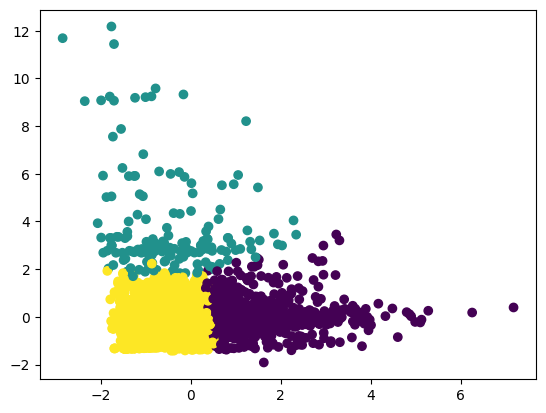

In [78]:
km = cluster.KMeans(n_clusters = 3, max_iter = 300, random_state = None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components = 2, whiten = True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c = city_groups_std['cluster'])
plt.show()

In [79]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,2,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,0,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,0,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,0,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,2,0.457189,-0.527191


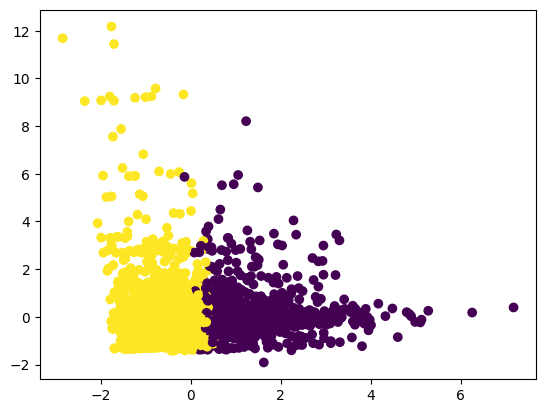

In [80]:
km = cluster.KMeans(n_clusters = 2, max_iter = 300, random_state = None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components = 2, whiten = True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c = city_groups_std['cluster'])
plt.show()

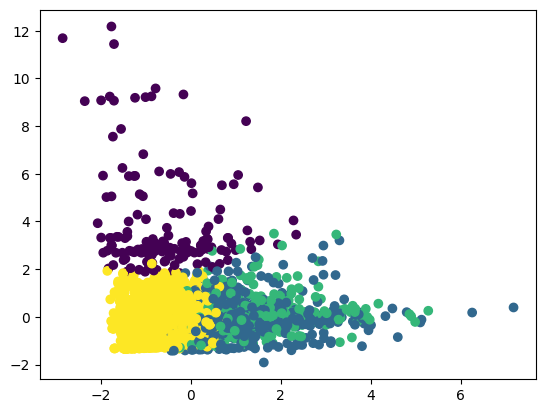

In [81]:
km = cluster.KMeans(n_clusters = 4, max_iter = 300, random_state = None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components = 2, whiten = True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c = city_groups_std['cluster'])
plt.show()

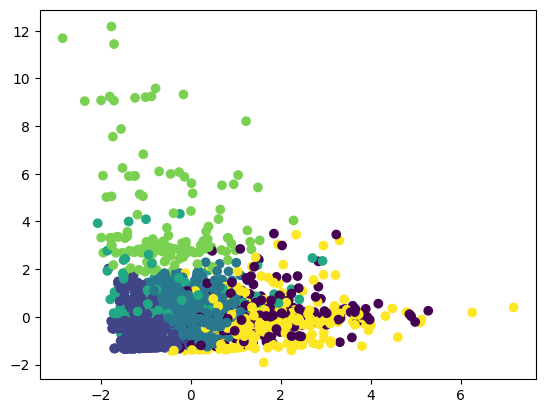

In [82]:
km = cluster.KMeans(n_clusters = 6, max_iter = 300, random_state = None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components = 2, whiten = True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c = city_groups_std['cluster'])
plt.show()

# Let's attempt to use the Elbow Method

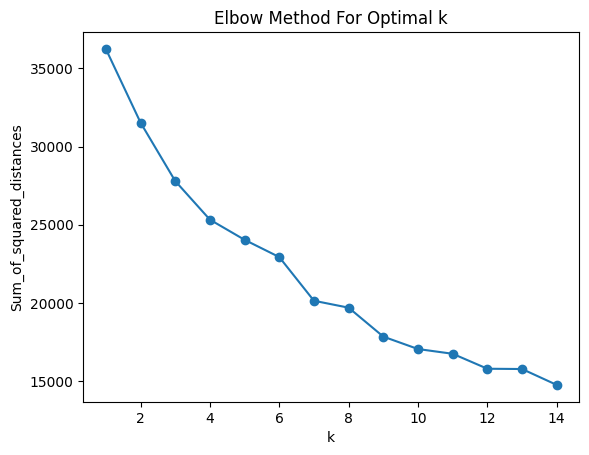

In [83]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Let's try to use the Silhouette Coefficient

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters = n_cluster).fit(city_groups_std[features_to_explore])
  label = kmeans.labels_
  sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric = 'euclidean')
  print("For n clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n clusters = 2, The Silhouette Coefficient is 0.23211813296821313
For n clusters = 3, The Silhouette Coefficient is 0.18516839649033076
For n clusters = 4, The Silhouette Coefficient is 0.2640294102683722
For n clusters = 5, The Silhouette Coefficient is 0.25746190790003587
For n clusters = 6, The Silhouette Coefficient is 0.18498732192447617
For n clusters = 7, The Silhouette Coefficient is 0.15716115462250668
For n clusters = 8, The Silhouette Coefficient is 0.1421158228651084
For n clusters = 9, The Silhouette Coefficient is 0.16973563591437166
For n clusters = 10, The Silhouette Coefficient is 0.17817431871089315


# Let's stick with K=3

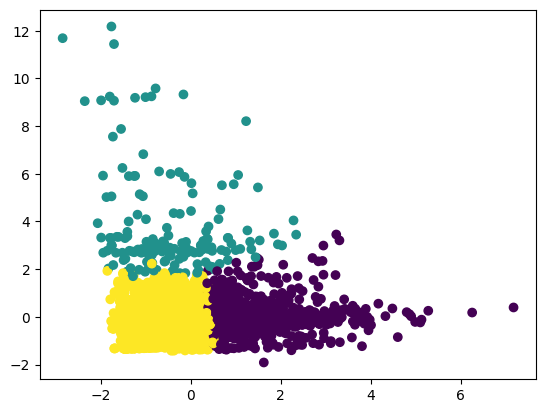

In [85]:
km = cluster.KMeans(n_clusters = 3, max_iter = 300, random_state = None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components = 2, whiten = True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:,0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:,1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c = city_groups_std['cluster'])
plt.show()

# Step 4: Profile and Inspect our 3 clusters

In [86]:
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28977.750916,5.270582,102.111364,3182.495703,0.108719,0.480355,2.013000,0.323064,1.068198
1,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412
2,28043.901769,2.755301,41.153148,1346.973372,0.143607,0.177969,1.983001,0.366946,1.072532


In [87]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,2,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,0,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,0,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,0,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,2,0.457189,-0.527191


In [88]:
city_groups_std['cluster'].unique()

array([2, 0, 1], dtype=int32)

<Axes: xlabel='cluster'>

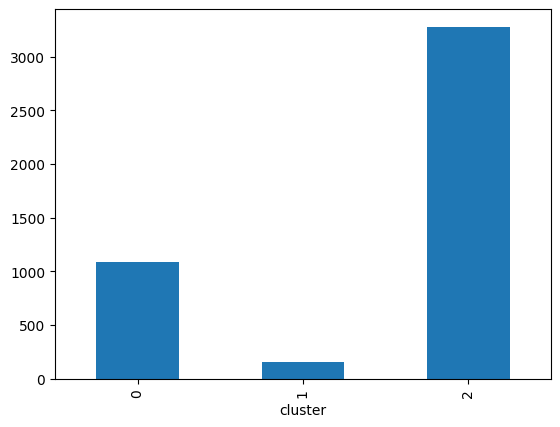

In [91]:
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind = 'bar')

In [92]:
city_groups_std[features_to_explore].shape

(4531, 8)